<a href="https://colab.research.google.com/github/BibekRai44/Hands-on-Machine-Learning/blob/main/Flight_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
from google.colab import files
uploaded = files.upload()

Saving Data_Train.xlsx to Data_Train.xlsx


In [6]:
train_df=pd.read_excel('Data_Train.xlsx')
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
from google.colab import files
uploaded = files.upload()

Saving Test_set.xlsx to Test_set.xlsx


In [8]:
test_df=pd.read_excel('Test_set.xlsx')
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [9]:
df=pd.concat([train_df,test_df],axis=0)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [10]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [11]:
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.7+ MB


In [13]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


<Axes: >

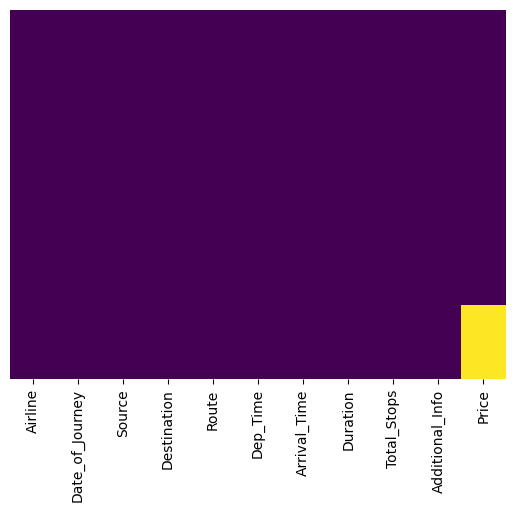

In [14]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

In [16]:
df.drop(columns='Additional_Info',inplace=True)

In [17]:
df['Total_Stops'].value_counts()

Total_Stops
1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: count, dtype: int64

In [18]:
df['Total_Stops']=df['Total_Stops'].str.replace('stops','')

In [19]:
df['Total_Stops']=df['Total_Stops'].str.replace('stop','')

In [20]:
df['Total_Stops']=df['Total_Stops'].str.replace('non-','0')

In [21]:
df['Total_Stops'].value_counts()

Total_Stops
1     7056
0     4340
2     1899
3       56
4        2
Name: count, dtype: int64

In [22]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,13302.0
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,0,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1,NaN


In [23]:
df['journey_day']=df['Date_of_Journey'].str.split('/').str[0]

In [24]:
df['journey_month']=df['Date_of_Journey'].str.split('/').str[1]

In [25]:
df['journey_year']=df['Date_of_Journey'].str.split('/').str[2]

In [26]:
df.drop(columns='Date_of_Journey')

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,journey_day,journey_month,journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,3897.0,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,7662.0,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,13882.0,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,6218.0,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,13302.0,01,03,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1,NaN,6,06,2019
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,0,NaN,27,03,2019
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1,NaN,6,03,2019
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1,NaN,6,03,2019


In [27]:
df['dep_hour']=df['Dep_Time'].str.split(':').str[0]

In [28]:
df['dep_minutes']=df['Dep_Time'].str.split(':').str[1]

In [29]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,journey_day,journey_month,journey_year,dep_hour,dep_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,3897.0,24,03,2019,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,7662.0,1,05,2019,05,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,13882.0,9,06,2019,09,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,6218.0,12,05,2019,18,05
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,13302.0,01,03,2019,16,50


In [30]:
df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Price              float64
journey_day         object
journey_month       object
journey_year        object
dep_hour            object
dep_minutes         object
dtype: object

In [31]:
df['journey_day']=df['journey_day'].astype(int)

In [32]:
df['journey_month']=df['journey_month'].astype(int)

In [33]:
df['journey_year']=df['journey_year'].astype(int)

In [34]:
df['dep_hour']=df['dep_hour'].astype(int)

In [35]:
df['dep_minutes']=df['dep_minutes'].astype(int)

In [36]:
df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Price              float64
journey_day          int64
journey_month        int64
journey_year         int64
dep_hour             int64
dep_minutes          int64
dtype: object

In [37]:
df['hour_duration']=df['Duration'].str.split('h').str[0]

In [38]:
df['minutes_duration'] = df['Duration'].str.split(' ').str[1].str.replace('m','')

In [39]:
df=df.drop(columns='Duration')

In [40]:
df=df.drop(columns='Arrival_Time')

In [41]:
df=df.drop(columns='Dep_Time')

In [42]:
df=df.drop(columns='Date_of_Journey')

In [43]:
df=df.drop(columns='Route')

In [44]:
df['Price'].fillna(df['Price'].mean(),inplace=True)

In [45]:
df

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,journey_year,dep_hour,dep_minutes,hour_duration,minutes_duration
0,IndiGo,Banglore,New Delhi,0,3897.000000,24,3,2019,22,20,2,50
1,Air India,Kolkata,Banglore,2,7662.000000,1,5,2019,5,50,7,25
2,Jet Airways,Delhi,Cochin,2,13882.000000,9,6,2019,9,25,19,NaN
3,IndiGo,Kolkata,Banglore,1,6218.000000,12,5,2019,18,5,5,25
4,IndiGo,Banglore,New Delhi,1,13302.000000,1,3,2019,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1,9087.064121,6,6,2019,20,30,23,55
2667,IndiGo,Kolkata,Banglore,0,9087.064121,27,3,2019,14,20,2,35
2668,Jet Airways,Delhi,Cochin,1,9087.064121,6,3,2019,21,50,6,35
2669,Air India,Delhi,Cochin,1,9087.064121,6,3,2019,4,0,15,15


In [46]:
df.dtypes

Airline              object
Source               object
Destination          object
Total_Stops          object
Price               float64
journey_day           int64
journey_month         int64
journey_year          int64
dep_hour              int64
dep_minutes           int64
hour_duration        object
minutes_duration     object
dtype: object

In [47]:
df['Price']=df['Price'].astype(int)

In [48]:
df.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [49]:
df.Airline.value_counts()

Airline
Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Airline'>

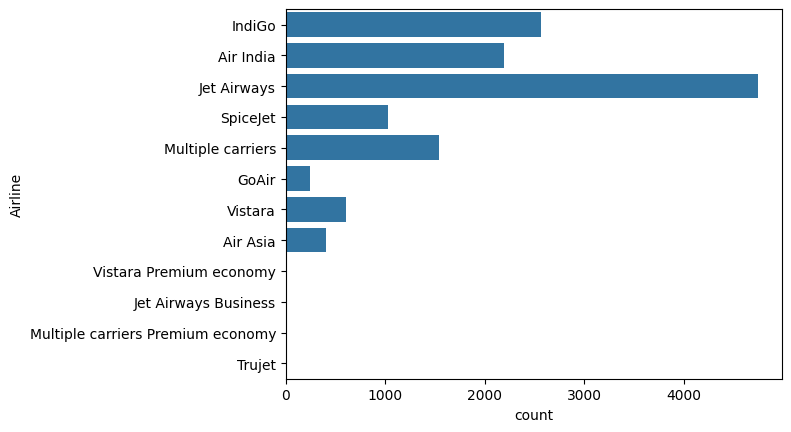

In [50]:
sns.countplot(y=df['Airline'])

In [51]:
df.dtypes

Airline             object
Source              object
Destination         object
Total_Stops         object
Price                int64
journey_day          int64
journey_month        int64
journey_year         int64
dep_hour             int64
dep_minutes          int64
hour_duration       object
minutes_duration    object
dtype: object

In [52]:
df

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,journey_year,dep_hour,dep_minutes,hour_duration,minutes_duration
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,19,NaN
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1,9087,6,6,2019,20,30,23,55
2667,IndiGo,Kolkata,Banglore,0,9087,27,3,2019,14,20,2,35
2668,Jet Airways,Delhi,Cochin,1,9087,6,3,2019,21,50,6,35
2669,Air India,Delhi,Cochin,1,9087,6,3,2019,4,0,15,15


In [53]:
df.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            1
Price                  0
journey_day            0
journey_month          0
journey_year           0
dep_hour               0
dep_minutes            0
hour_duration          0
minutes_duration    1286
dtype: int64

In [54]:
df.dropna(subset=['Total_Stops'], inplace=True)


In [55]:
df.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Price                  0
journey_day            0
journey_month          0
journey_year           0
dep_hour               0
dep_minutes            0
hour_duration          0
minutes_duration    1286
dtype: int64

In [56]:
df.dtypes

Airline             object
Source              object
Destination         object
Total_Stops         object
Price                int64
journey_day          int64
journey_month        int64
journey_year         int64
dep_hour             int64
dep_minutes          int64
hour_duration       object
minutes_duration    object
dtype: object

In [57]:
df = df[df['Total_Stops'] != '']
df['Total_Stops'] = df['Total_Stops'].astype(int)

In [58]:
df.dtypes

Airline             object
Source              object
Destination         object
Total_Stops          int64
Price                int64
journey_day          int64
journey_month        int64
journey_year         int64
dep_hour             int64
dep_minutes          int64
hour_duration       object
minutes_duration    object
dtype: object

In [59]:
df['hour_duration'].value_counts()

hour_duration
2     2967
1      785
3      627
5      608
7      600
9      551
12     538
8      531
13     516
11     467
10     459
6      442
14     424
15     339
23     330
26     292
16     286
4      278
22     273
24     240
21     237
25     231
27     222
20     203
18     179
19     168
17     161
28     116
29      76
30      61
38      41
37      22
33      21
32      12
36      11
35      10
34       9
31       8
39       3
47       2
42       2
5m       2
40       2
41       1
Name: count, dtype: int64

In [62]:
df = df[df['hour_duration'].apply(lambda x: x.isdigit())]
df['hour_duration'] = df['hour_duration'].astype(int)

In [63]:
df.dtypes

Airline             object
Source              object
Destination         object
Total_Stops          int64
Price                int64
journey_day          int64
journey_month        int64
journey_year         int64
dep_hour             int64
dep_minutes          int64
hour_duration        int64
minutes_duration    object
dtype: object

In [64]:
df['hour_duration'].value_counts()

hour_duration
2     2967
1      785
3      627
5      608
7      600
9      551
12     538
8      531
13     516
11     467
10     459
6      442
14     424
15     339
23     330
26     292
16     286
4      278
22     273
24     240
21     237
25     231
27     222
20     203
18     179
19     168
17     161
28     116
29      76
30      61
38      41
37      22
33      21
32      12
36      11
35      10
34       9
31       8
39       3
47       2
42       2
40       2
41       1
Name: count, dtype: int64

In [67]:
df.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Price                  0
journey_day            0
journey_month          0
journey_year           0
dep_hour               0
dep_minutes            0
hour_duration          0
minutes_duration    1284
dtype: int64

In [70]:
df['minutes_duration'] = pd.to_numeric(df['minutes_duration'], errors='coerce')
df['minutes_duration'].fillna(df['minutes_duration'].mean(), inplace=True)

In [71]:
df.dtypes

Airline              object
Source               object
Destination          object
Total_Stops           int64
Price                 int64
journey_day           int64
journey_month         int64
journey_year          int64
dep_hour              int64
dep_minutes           int64
hour_duration         int64
minutes_duration    float64
dtype: object

In [72]:
df.isnull().sum()

Airline             0
Source              0
Destination         0
Total_Stops         0
Price               0
journey_day         0
journey_month       0
journey_year        0
dep_hour            0
dep_minutes         0
hour_duration       0
minutes_duration    0
dtype: int64

In [75]:
df['minutes_duration']=df['minutes_duration'].astype(int)

In [76]:
df

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,journey_year,dep_hour,dep_minutes,hour_duration,minutes_duration
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,19,31
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1,9087,6,6,2019,20,30,23,55
2667,IndiGo,Kolkata,Banglore,0,9087,27,3,2019,14,20,2,35
2668,Jet Airways,Delhi,Cochin,1,9087,6,3,2019,21,50,6,35
2669,Air India,Delhi,Cochin,1,9087,6,3,2019,4,0,15,15


In [77]:
df.isnull().sum()

Airline             0
Source              0
Destination         0
Total_Stops         0
Price               0
journey_day         0
journey_month       0
journey_year        0
dep_hour            0
dep_minutes         0
hour_duration       0
minutes_duration    0
dtype: int64

In [80]:
df

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,journey_year,dep_hour,dep_minutes,hour_duration,minutes_duration
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,19,31
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1,9087,6,6,2019,20,30,23,55
2667,IndiGo,Kolkata,Banglore,0,9087,27,3,2019,14,20,2,35
2668,Jet Airways,Delhi,Cochin,1,9087,6,3,2019,21,50,6,35
2669,Air India,Delhi,Cochin,1,9087,6,3,2019,4,0,15,15


In [81]:
import sklearn
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()